In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Reading the dataset

dset = pd.read_csv('application_data.csv')

In [10]:
# Determining datset shape

dset.shape

(307511, 122)

In [11]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=dset.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

In [12]:
# Removing the missing data columns(64)
emptycol = list(emptycol[emptycol.values>=0.3].index)
dset.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [13]:
# Checking the columns having less null percentage

dset.isnull().sum()/len(dset)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [14]:
#An annuity is a contract between you and an insurance company that requires the insurer to make payments to you, either immediately or in the future
#AMT_ANNUITY is having less null values, so we fill it with median values due to mean being inappropriate as this column is an outlier.
values=dset['AMT_ANNUITY'].median()

dset.loc[dset['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [15]:
# Searching for the column for null values

dset.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Now that all cells have nil null values, we can proceed with the process.

In [16]:
# Removing rows having null values greater than or equal to 30%

emptyrow=dset.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(dset)].index)
dset.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [17]:
# Remove columns unnecessary for analysis from the dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

dset.drop(labels=unwanted,axis=1,inplace=True)

We need to fill or delete the values in the cells whose values are put as XNA i.e Not available.

In [18]:
# Find the categorical columns having 'XNA' values
    
# For Gender column

dset[dset['CODE_GENDER']=='XNA'].shape

(4, 28)

In [19]:
#Since there are only 4 rows with XNA, we will further check the categories in Gender to decide wether to fill or drop the rows

dset['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [20]:
# Updating the column 'CODE_GENDER' with "F" for the dataset as the females are about douvle the number of males, converting XNA to F does not make a difference

dset.loc[dset['CODE_GENDER']=='XNA','CODE_GENDER']='F'
dset['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [21]:
# XNA values for Organization column

dset[dset['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [22]:
#As 55374 rows are XNA, we need to check how much 55374 is compared to the total rows to see if we can fill or drop.

dset['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [23]:
#Since 55374 is only abot 18% of the total rows there will be no major impact if we drop them.

dset=dset.drop(dset.loc[dset['ORGANIZATION_TYPE']=='XNA'].index)
dset[dset['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [24]:
# Converting all variables into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

dset[numeric_columns]=dset[numeric_columns].apply(pd.to_numeric)
dset.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [25]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_dset=dset.loc[dset["TARGET"]==0]
target1_dset=dset.loc[dset["TARGET"]==1]

In [26]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_dset)/len(target1_dset),2)

10.55

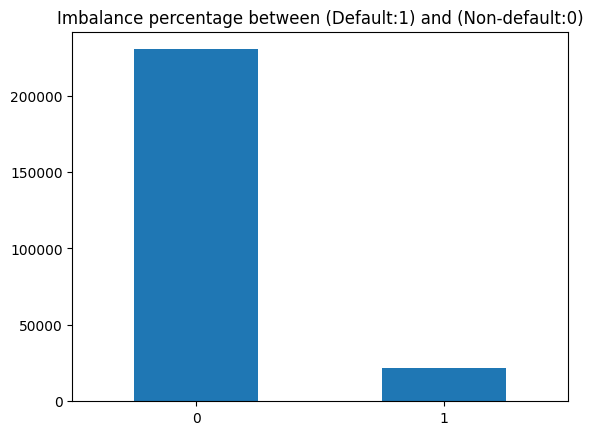

In [27]:
# Imbalance graph
dset['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance percentage between (Default:1) and (Non-default:0)')
plt.xticks(rotation = 0)
plt.show()

There is a large imbalance between the default percentage (TARGET=1) and the non-default percentage (TARGET=0) in the dataset. The non-default to default ratio is 11.4:1. Even with low failure rates, application failures are costly and should be carefully analyzed.

Contract type graphical analysis

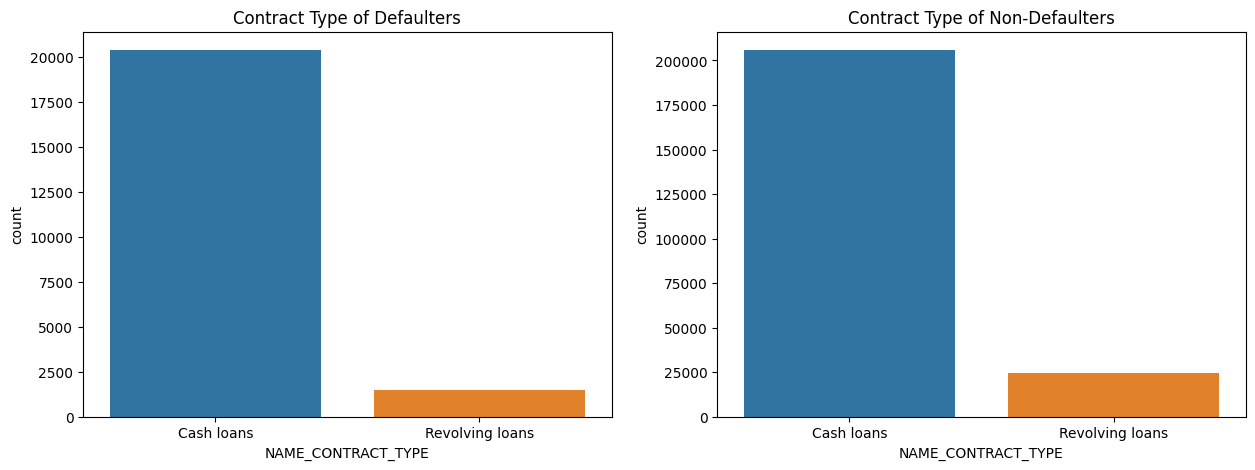

In [28]:
# plotting based on 'NAME_CONTRACT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target1_dset)
plt.title('Contract Type of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target0_dset)
plt.title('Contract Type of Non-Defaulters')

plt.show()

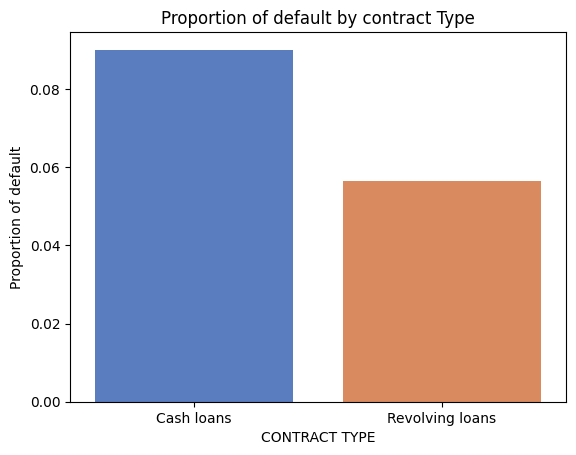

In [29]:
# proportion of non-default
c = pd.DataFrame(dset.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts()/dset.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_CONTRACT_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_CONTRACT_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_CONTRACT_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('CONTRACT TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

Cash loans, both defaulted and non-defaulted, outnumber revolving credits. Cash loans have higher default rates than revolving loans

Graphical analysis by Gender

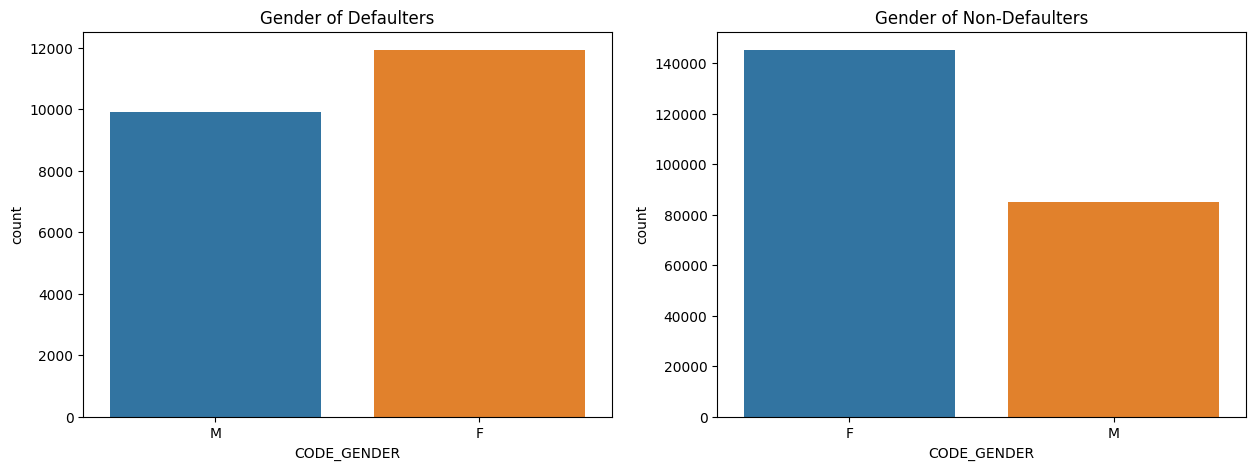

In [30]:
# plotting based on 'CODE_GENDER' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = target1_dset)
plt.title('Gender of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = target0_dset)
plt.title('Gender of Non-Defaulters')

plt.show()

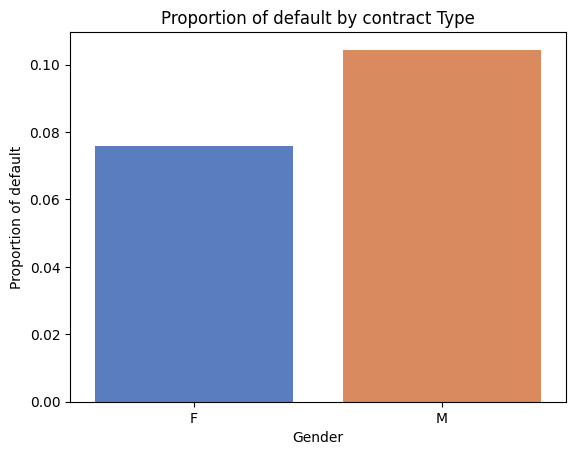

In [31]:
# proportion of non-default
c = pd.DataFrame(dset.groupby(['CODE_GENDER'])['TARGET'].value_counts()/dset.groupby(['CODE_GENDER'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['CODE_GENDER'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['CODE_GENDER','Non-default']
ax2 = sns.barplot(x='CODE_GENDER', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

There are many female customers in both default and non-default. Also, female applicants have a lower dropout rate than male applicants.

Based on Car Ownership

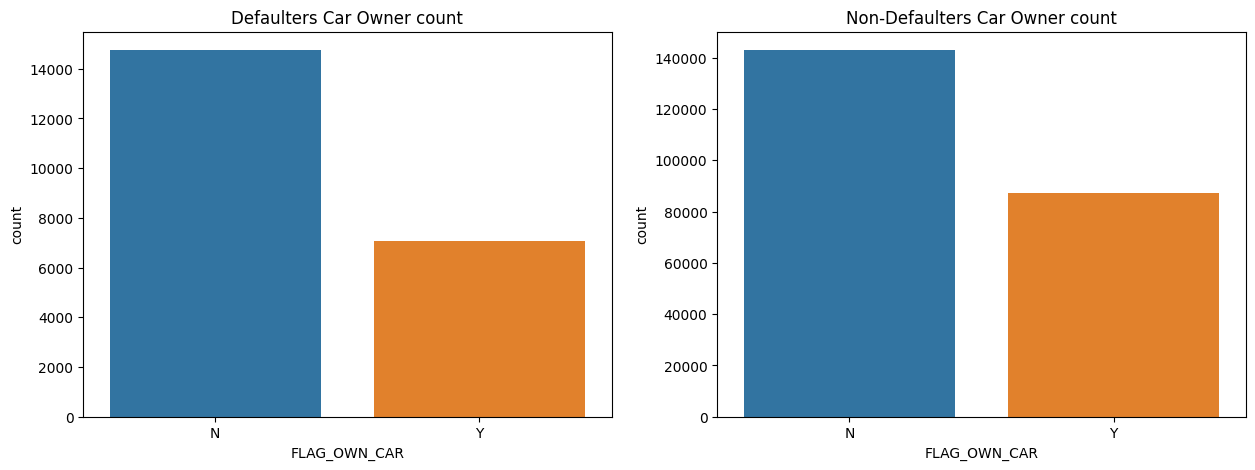

In [32]:
# plotting based on 'FLAG_OWN_CAR' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = target1_dset)
plt.title('Defaulters Car Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = target0_dset)
plt.title('Non-Defaulters Car Owner count')

plt.show()

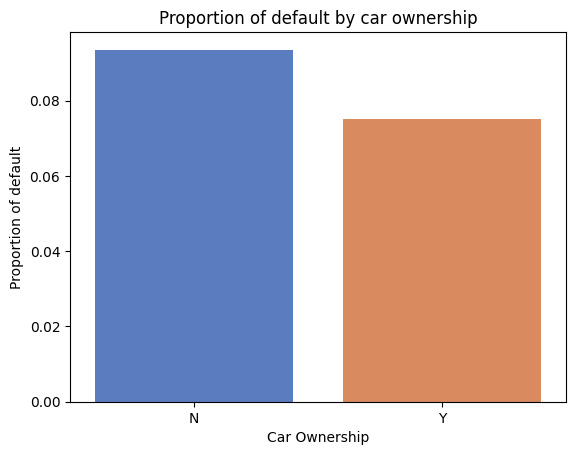

In [33]:
# proportion of non-default
c = pd.DataFrame(dset.groupby(['FLAG_OWN_CAR'])['TARGET'].value_counts()/dset.groupby(['FLAG_OWN_CAR'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_CAR'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_CAR','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_CAR', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Car Ownership')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by car ownership')
plt.show()

Not that big of a difference between defaults by carowners and non car owners

Based on realty ownership

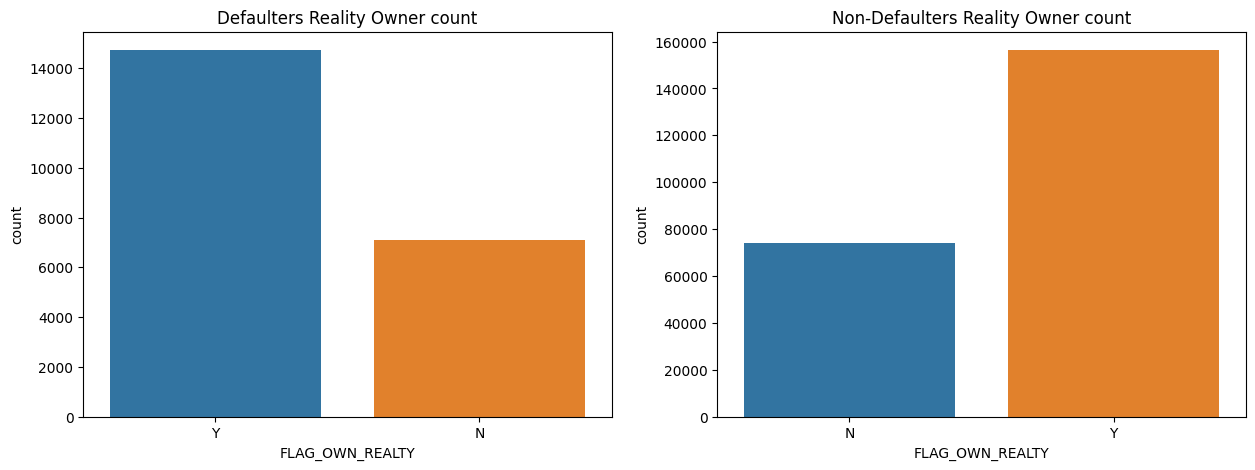

In [34]:
# plotting based on 'FLAG_OWN_REALTY' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = target1_dset)
plt.title('Defaulters Reality Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = target0_dset)
plt.title('Non-Defaulters Reality Owner count')

plt.show()

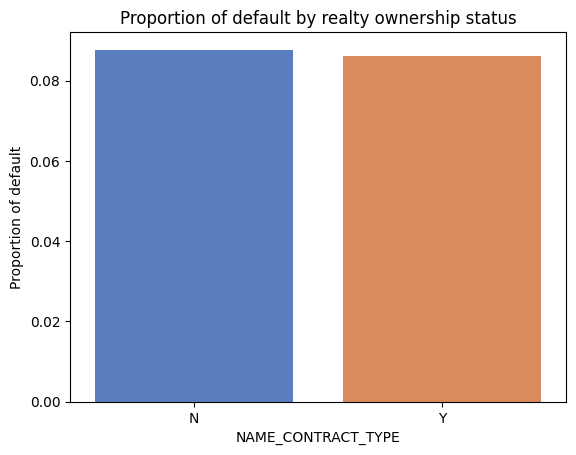

In [35]:
# proportion of non-default
c = pd.DataFrame(dset.groupby(['FLAG_OWN_REALTY'])['TARGET'].value_counts()/dset.groupby(['FLAG_OWN_REALTY'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_REALTY'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_REALTY','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_REALTY', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by realty ownership status')
plt.show()

Defalut/Non-default both the cases, the count of client who do own real estate is higher than who has not. Applicants with no realty ownership has a higher propensity to default than the clients who own real estate.

Income Type

In [36]:
display(pd.DataFrame(target1_dset['NAME_INCOME_TYPE'].value_counts()))
display(pd.DataFrame(target0_dset['NAME_INCOME_TYPE'].value_counts()))

,NAME_INCOME_TYPE
Working,15224
Commercial associate,5360
State servant,1249
Maternity leave,2


,NAME_INCOME_TYPE
Working,143550
Commercial associate,66257
State servant,20454
Student,18
Pensioner,10
Businessman,10
Maternity leave,3


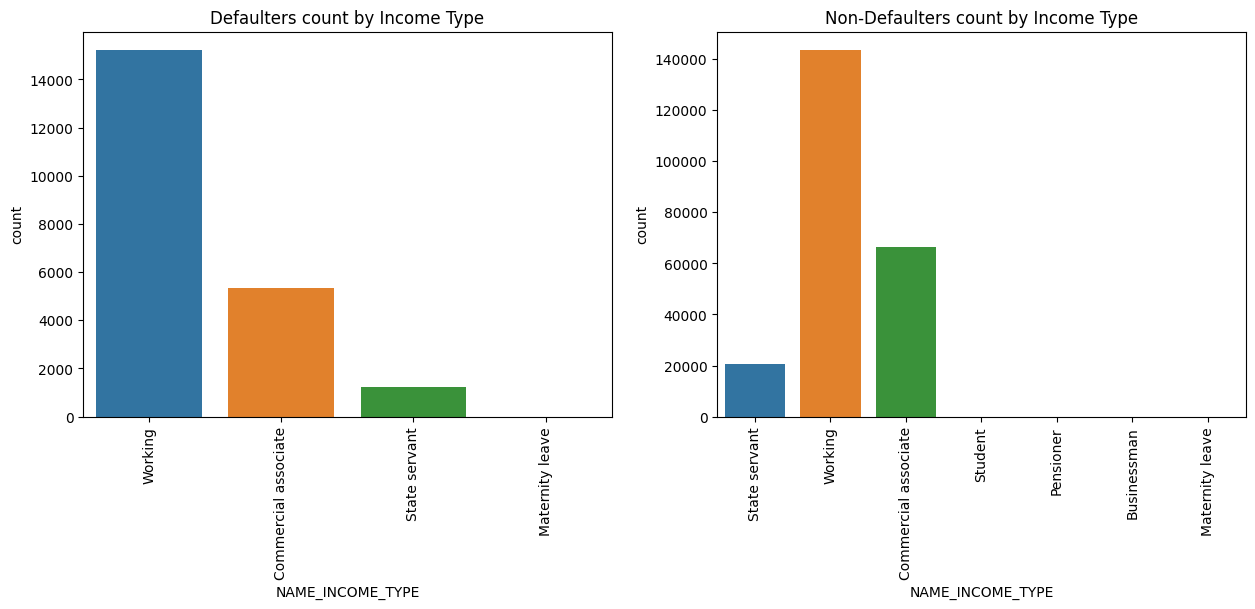

In [37]:
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target1_dset)
plt.xticks(rotation = 90)
plt.title('Defaulters count by Income Type')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target0_dset)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by Income Type')

plt.show()

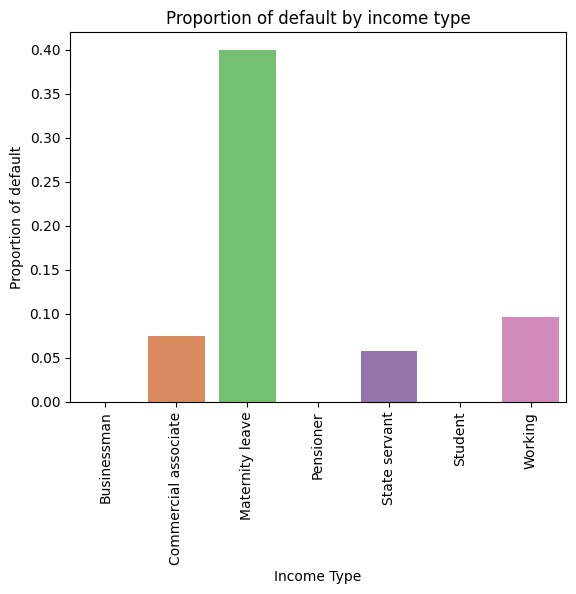

In [38]:
# proportion of non-default
c = pd.DataFrame(dset.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts()/dset.groupby(['NAME_INCOME_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_INCOME_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_INCOME_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_INCOME_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Income Type')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by income type')
plt.xticks(rotation = 90)
plt.show()

The majority of the applicants are from working, commercial associates, pensioners, and state servants. The remaining categories of income types are minimal. Default rates are higher among working and commercial associates but relatively lower for pensioners and state servants.

Education type

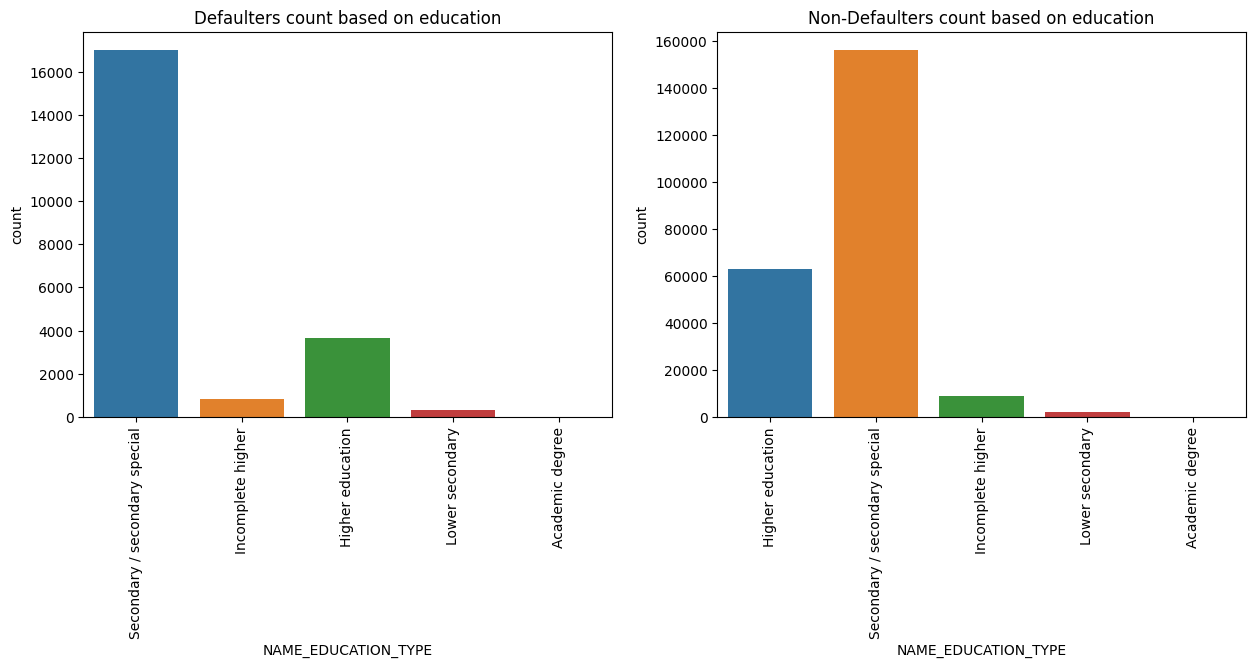

In [39]:
# plotting based on 'NAME_EDUCATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target1_dset)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on education')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target0_dset)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on education')

plt.show()

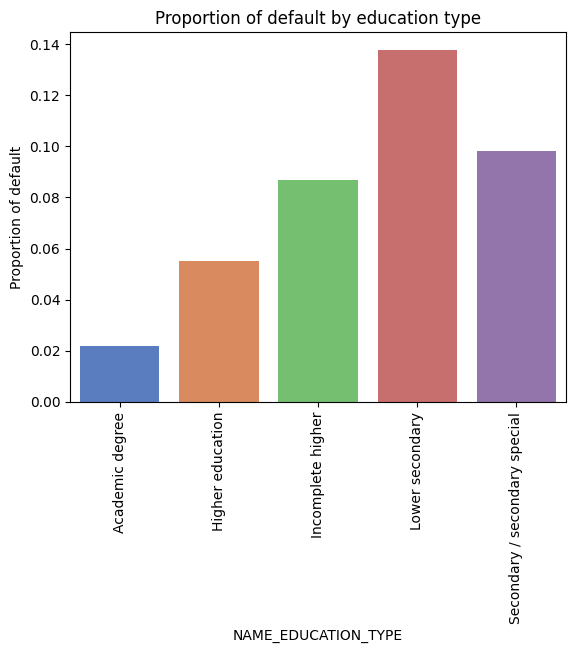

In [40]:
# proportion of non-default
c = pd.DataFrame(dset.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts()/dset.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_EDUCATION_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_EDUCATION_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_EDUCATION_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by education type')
plt.xticks(rotation = 90)
plt.show()

Applicants with a high school diploma are the most common and non-defaulters. Graduate applicants are the smallest group of applicants who have applied for loans, and applicants with this background have no default record. From the figure above, we can see that a clear pattern emerges. The more educated an applicant is, the less likely they are to drop out.

Bivariate analysis for non default i.e Type 0

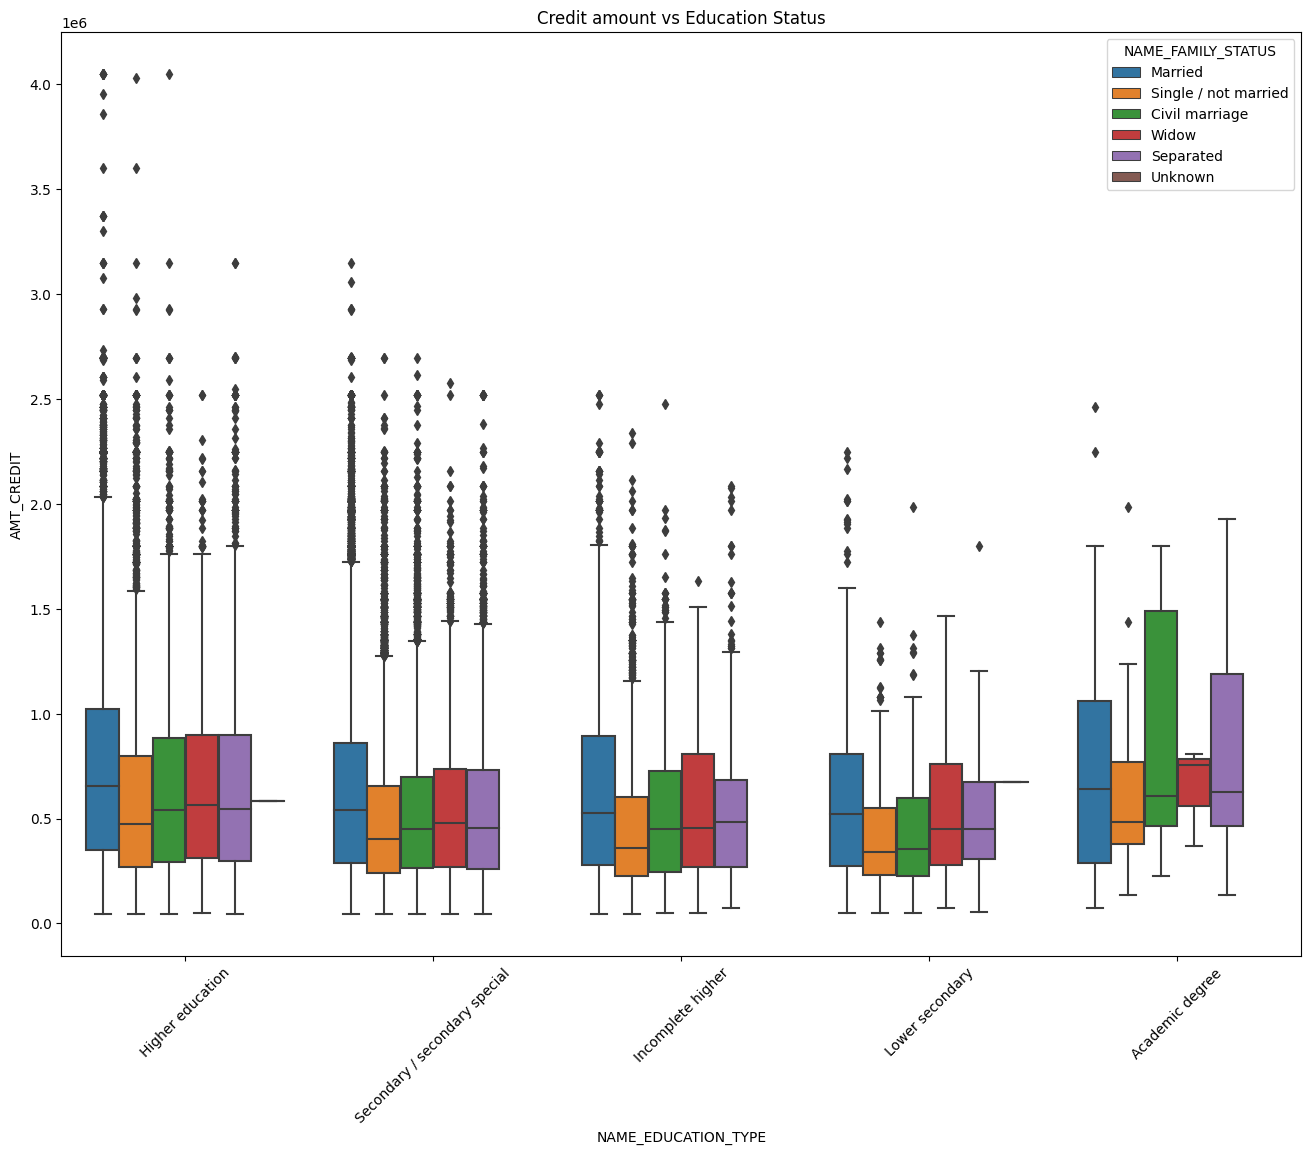

In [41]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_dset, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

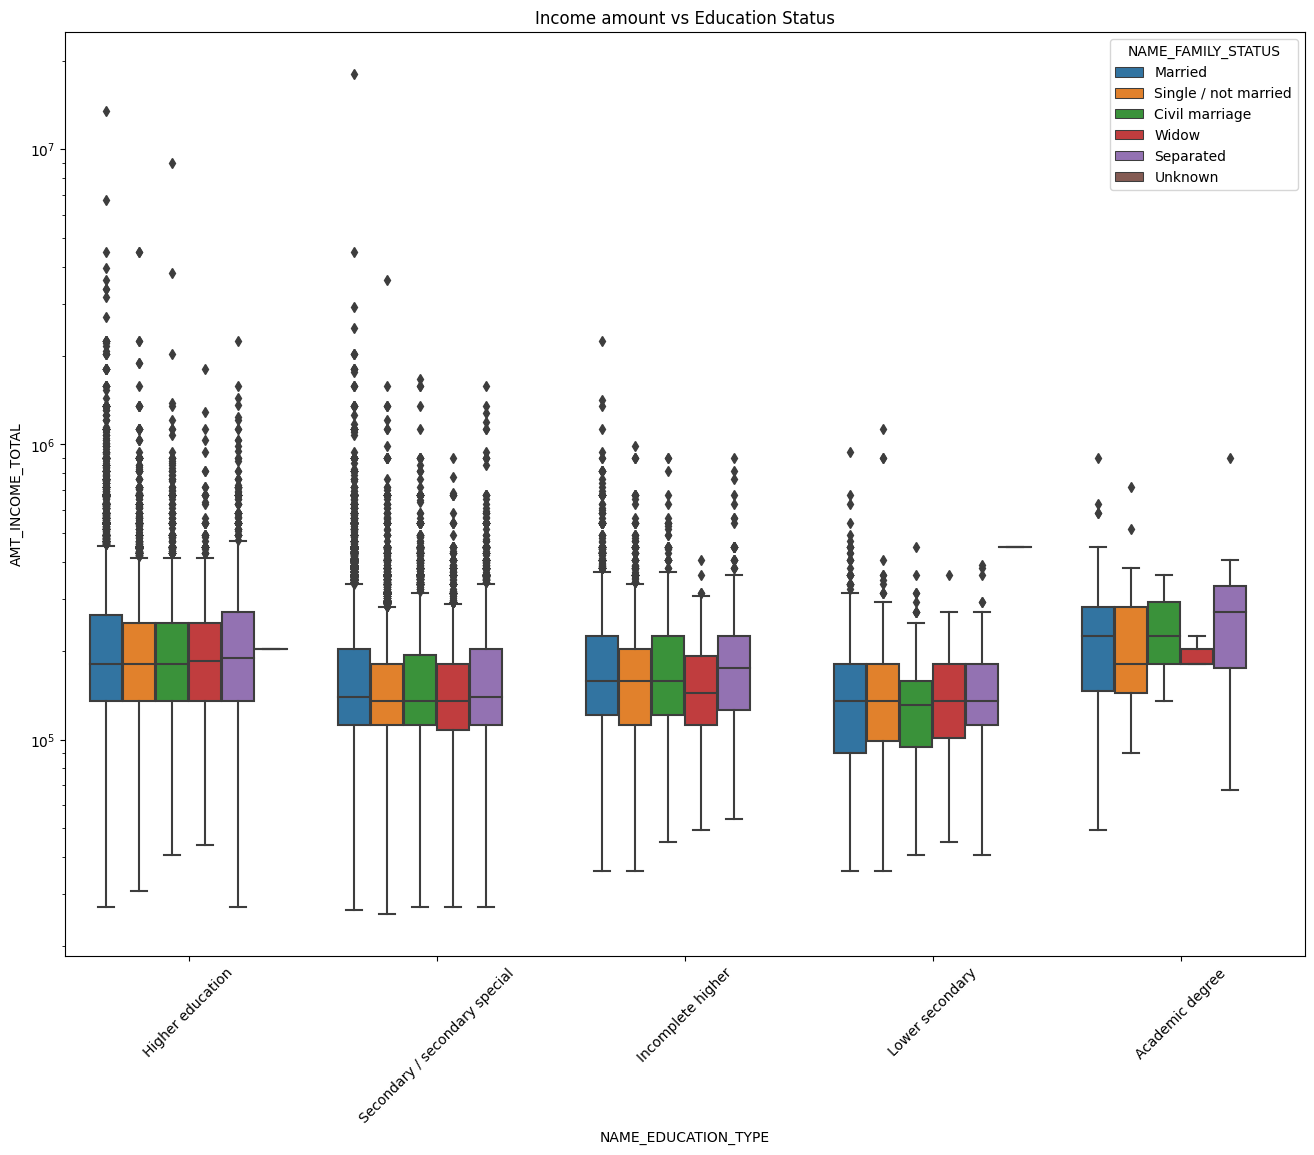

In [42]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_dset, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Bivariate analysis for type 1 i.e defaulters.

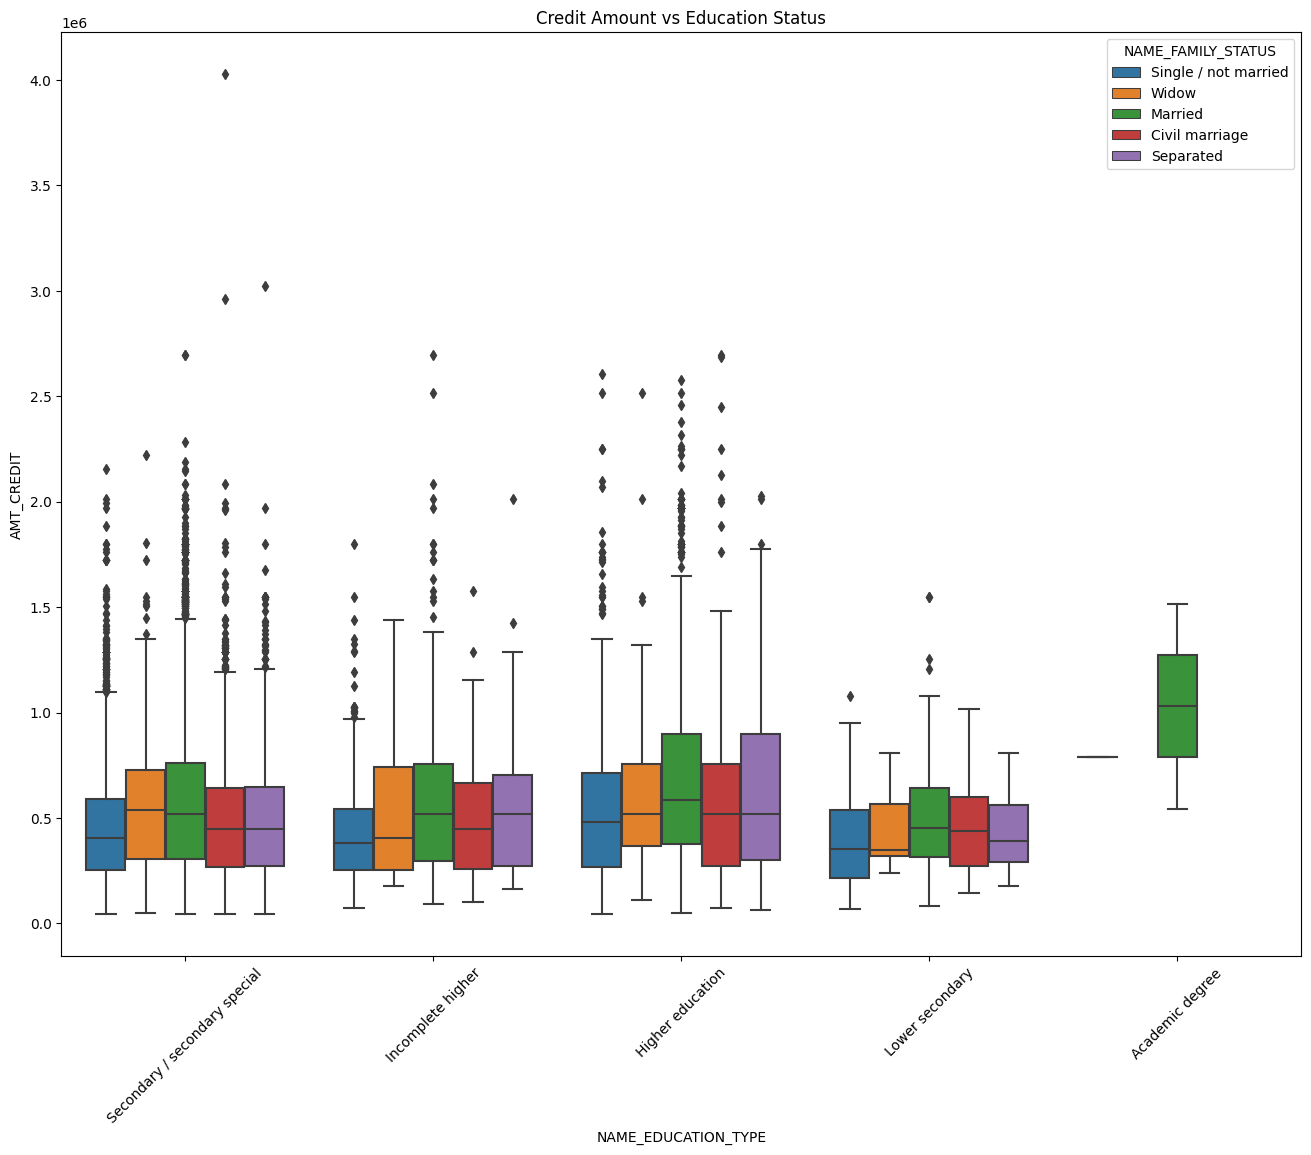

In [44]:
# Box plotting for credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = target1_dset, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

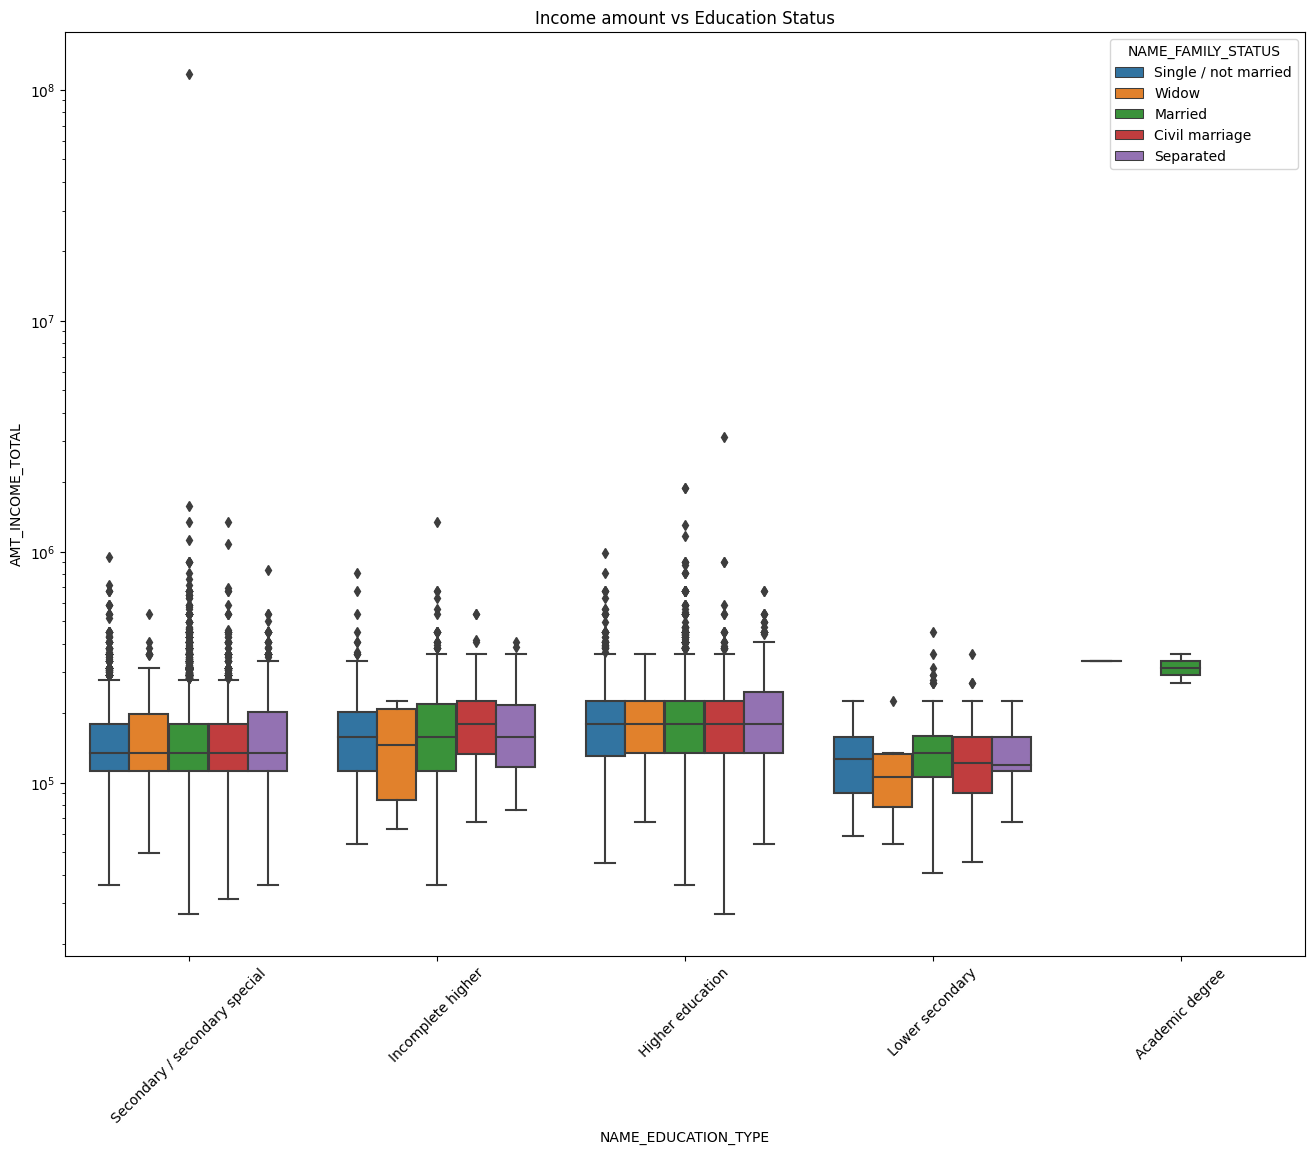

In [45]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_dset, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Conclusion:
Banks should focus on people with education background of graduation and above having their own homes and commercial employees and civil servants.
They should also give loans to working people even though they have the highest number of defaulters, they are also the largest number of non defaulters.